In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect("sales_data.db")

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [5]:
sales_data = [
    ("Apple", 10, 0.5),
    ("Banana", 20, 0.3),
    ("Orange", 15, 0.7),
    ("Apple", 5, 0.5),
    ("Banana", 10, 0.3),
    ("Orange", 10, 0.7),
]

In [6]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

In [7]:
conn.commit()

In [8]:
conn.close()

In [9]:
import pandas as pd
import sqlite3

In [10]:
conn = sqlite3.connect("sales_data.db")

In [11]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

In [12]:
df = pd.read_sql_query(query, conn)

In [13]:
conn.close()

In [14]:
print("Sales Summary:")
print(df)

Sales Summary:
  product  total_qty  revenue
0   Apple         45     22.5
1  Banana         90     27.0
2  Orange         75     52.5


In [15]:
import matplotlib.pyplot as plt

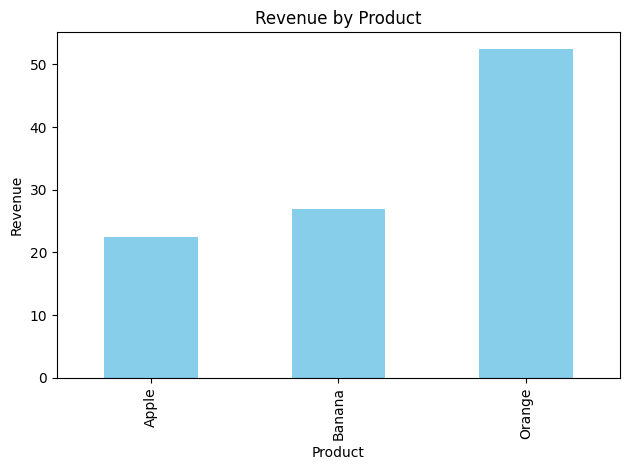

<Figure size 640x480 with 0 Axes>

In [19]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
plt.savefig("sales_chart.png")

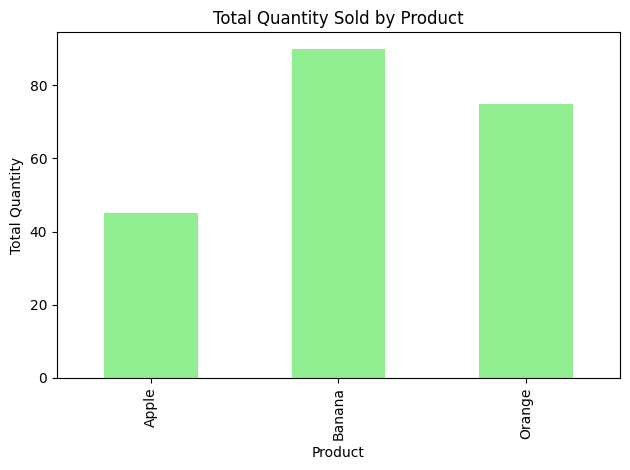

<Figure size 640x480 with 0 Axes>

In [21]:
df.plot(kind='bar', x='product', y='total_qty', legend=False, color='lightgreen')
plt.title("Total Quantity Sold by Product")
plt.xlabel("Product")
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()
plt.savefig("sales_chart1.png");